# Moving Average Crossover Trading Strategy
## Manual Step-by-Step Approach

In this interactive python notebook we implement a moving average crossover trading strategy sourcing data dynamically from **yahoo finance!**.  Using a pandas DataFrame we run the strategy by firstly initializing moving average indicators for a given short and long moving average indicator. Secondly we inspect the indicator date for moving average crossovers and record the signal +1 for a buy and -1 for a sell signal. Third we convert the signal into a position ensuring to close out the final position to capture the backtest statistics accurately. Forthly we compute the log returns of a passive benchmark and for the moving average crossover strategy.

In [1]:
import os
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs

# Magic function to enable matplotlib charting in jupyter notebooks
%matplotlib inline

# Allow Multiple Line Printing and Disable Warnings

In [2]:
# Multiple Line Printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Current Working Directory

In [3]:
# Print Current Working Directory
os.getcwd()

'C:\\Users\\nburg\\Desktop\\TEST'

# Read CSV File Data using Pandas

In [4]:
# Load Data from CSV File
df = pd.read_csv("DataMovingAvg.csv", index_col="Date", parse_dates=True, dayfirst=True)

In [5]:
df.head()

,Close
Date,
2002-07-01,161.75
2002-07-02,160.40
2002-07-03,159.80
2002-07-04,158.00
2002-07-05,157.55


# Plot CSV File Data using Matplotlib

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'CSV Data')

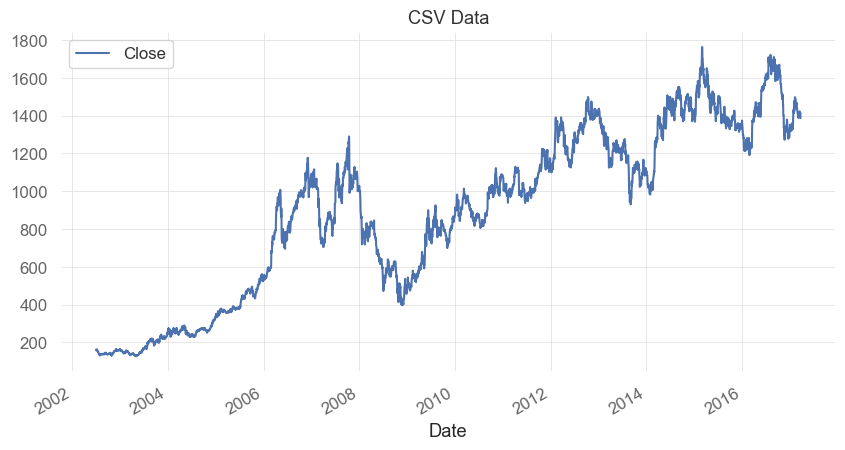

In [6]:
# Plot CSV Data
df.plot(figsize=(10,5))
plt.title('CSV Data')
plt.show()

# Download Data from Yahoo Finance!

In [7]:
# Data Specification
symbol = "NVDA"
end_date = dt.datetime.now().date()
start_date = end_date - pd.Timedelta(days=3 * 365)

# Load Data from Yahoo Finance
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-06,138.300003,141.419998,136.649994,137.365005,137.027679,78442000
2020-10-07,139.997498,141.192505,138.634995,139.639999,139.297089,41808400
2020-10-08,140.750000,140.845001,137.580002,138.387497,138.047638,37890000
2020-10-09,137.669998,138.242493,136.607498,137.627502,137.289520,34689200
2020-10-12,139.895004,143.470001,139.125000,142.259995,141.910645,43474400


# Plot Yahoo Finance Data using Matplotlib

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Yahoo Finance Data')

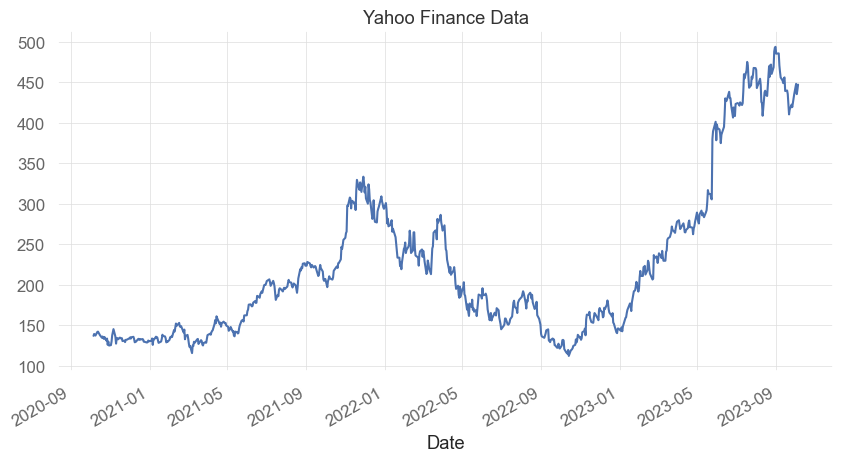

In [9]:
# Plot Yahoo Data
df["Adj Close"].plot(figsize=(10,5))
plt.title('Yahoo Finance Data')
plt.show()

# Add Simple and Exponential Moving Averages (SMA, SEMA)

In [10]:
# Set short and long moving average days
sma_days = 10
lma_days = 50

# create short-term and long-term moving average columns
df["SMA"] = df["Close"].rolling(sma_days).mean()
df["LMA"] = df["Close"].rolling(lma_days).mean()

# Copy DataFrame and Drop rows with NaN data
df2 = df.copy()
df2.dropna(inplace=True)

In [11]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA
Date,,,,,,,,
2020-12-15,134.397507,134.639999,131.867493,133.604996,133.316299,19301600,133.041002,134.40095
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815


In [12]:
# Add Short-Term and Long-Term Exponential Moving Averages

# Calculate the first element of SEMA and LEMA as SMA and LMA, respectively
df2["SEMA"] = df2["SMA"]
df2["LEMA"] = df2["LMA"]

# Calculate the SEMA and LEMA for the remaining rows using a vectorized approach
df2["SEMA"] = df2["Close"].ewm(span=sma_days, adjust=False).mean()
df2["LEMA"] = df2["Close"].ewm(span=lma_days, adjust=False).mean()


In [13]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA
Date,,,,,,,,,,
2020-12-15,134.397507,134.639999,131.867493,133.604996,133.316299,19301600,133.041002,134.40095,133.604996,133.604996
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215,133.390452,133.558722
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760,133.394462,133.552988
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425,133.271832,133.520321
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815,133.281044,133.512564


# Plot Exponential Moving Averages

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Exponential Moving Averages')

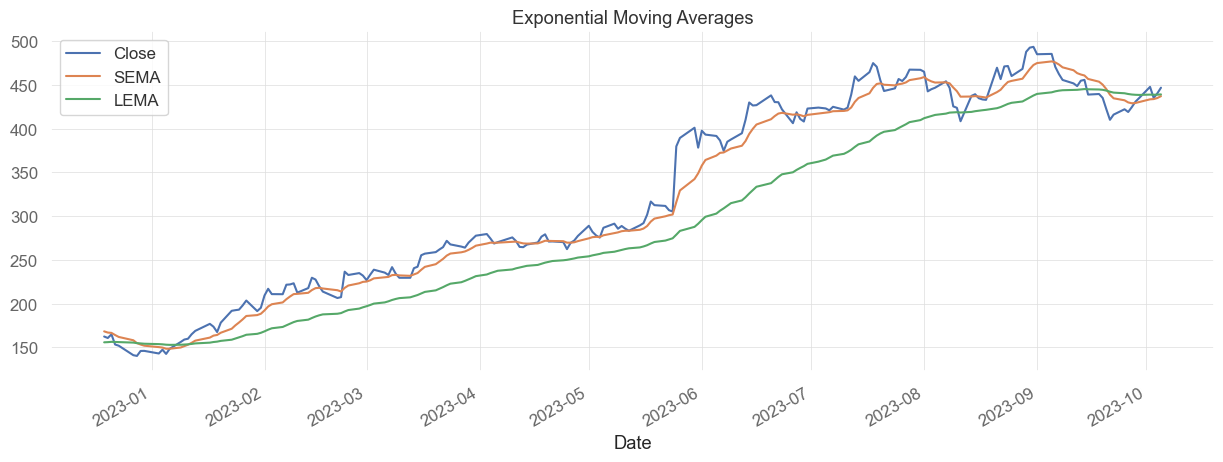

In [14]:
df2[["Close","SEMA", "LEMA"]].tail(200).plot(figsize=(15,5))
plt.title("Exponential Moving Averages")
plt.show()

# Add Exponential Moving Average Cross-Over Signals

In [15]:
# To detect a cross-over we need to compare today's data with the previous day
# Example: Is today above and yesterday below (i.e. cross-over)

# Add Previous Day Data
df2["SEMA_PREV"] = df2["SEMA"].shift(1)
df2["LEMA_PREV"] = df2["LEMA"].shift(1)

In [16]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA,SEMA_PREV,LEMA_PREV
Date,,,,,,,,,,,,
2020-12-15,134.397507,134.639999,131.867493,133.604996,133.316299,19301600,133.041002,134.40095,133.604996,133.604996,NaN,NaN
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215,133.390452,133.558722,133.604996,133.604996
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760,133.394462,133.552988,133.390452,133.558722
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425,133.271832,133.520321,133.394462,133.552988
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815,133.281044,133.512564,133.271832,133.520321


In [17]:
# Buy Signal
df2["Signal"] = np.where((df2["SEMA"] > df2["LEMA"])
                         & (df2["SEMA_PREV"] < df2["LEMA_PREV"]), 1, 0)

# Sell Signal
df2["Signal"] = np.where((df2["SEMA"] < df2["LEMA"])
                         & (df2["SEMA_PREV"] > df2["LEMA_PREV"]), -1, df2["Signal"])

In [18]:
# Count Number of Signals
df2["Signal"].value_counts()

Signal
 0    686
 1     10
-1     10
Name: count, dtype: int64

In [19]:
df2.head()
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA,SEMA_PREV,LEMA_PREV,Signal
Date,,,,,,,,,,,,,
2020-12-15,134.397507,134.639999,131.867493,133.604996,133.316299,19301600,133.041002,134.40095,133.604996,133.604996,NaN,NaN,0
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215,133.390452,133.558722,133.604996,133.604996,0
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760,133.394462,133.552988,133.390452,133.558722,0
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425,133.271832,133.520321,133.394462,133.552988,0
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815,133.281044,133.512564,133.271832,133.520321,0


,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA,SEMA_PREV,LEMA_PREV,Signal
Date,,,,,,,,,,,,,
2023-09-29,438.269989,441.440002,433.070007,434.989990,434.989990,39722100,425.541003,449.351601,430.414340,438.604873,429.397528,438.752420,0
2023-10-02,440.299988,451.750000,438.609985,447.820007,447.820007,43329800,426.357004,449.446201,433.579006,438.966251,430.414340,438.604873,0
2023-10-03,448.079987,451.299988,432.459991,435.170013,435.170013,47085000,426.354004,449.227202,433.868280,438.817379,433.579006,438.966251,0
2023-10-04,437.420013,441.429993,432.920013,440.410004,440.410004,36182100,428.156003,448.899601,435.057685,438.879835,433.868280,438.817379,0
2023-10-05,440.500000,449.000000,438.880005,446.880005,446.880005,39285100,431.827002,448.746802,437.207197,439.193567,435.057685,438.879835,0


# Create Positions

In [20]:
# Create position based on signal, forward filling all zeros
df2["Position"] = df2["Signal"].replace(to_replace=0, method="ffill")

In [21]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA,SEMA_PREV,LEMA_PREV,Signal,Position
Date,,,,,,,,,,,,,,
2020-12-15,134.397507,134.639999,131.867493,133.604996,133.316299,19301600,133.041002,134.40095,133.604996,133.604996,NaN,NaN,0,0
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215,133.390452,133.558722,133.604996,133.604996,0,0
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760,133.394462,133.552988,133.390452,133.558722,0,0
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425,133.271832,133.520321,133.394462,133.552988,0,0
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815,133.281044,133.512564,133.271832,133.520321,0,0


# Compute Strategy Returns

In [22]:
# Buy and Hold Returns
df2["BH_Returns"] = np.log(df2["Close"] /df2["Close"].shift(1))

# Strategy Returns - This can be done as Strategy Return multiplied by Position
# Note: We trade the position the following day as we have to wait for the close to happen before trading
df2["Strategy_Returns"] = df2["BH_Returns"] * df2["Position"].shift(1)

In [23]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA,SEMA_PREV,LEMA_PREV,Signal,Position,BH_Returns,Strategy_Returns
Date,,,,,,,,,,,,,,,,
2020-12-15,134.397507,134.639999,131.867493,133.604996,133.316299,19301600,133.041002,134.40095,133.604996,133.604996,NaN,NaN,0,0,NaN,NaN
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215,133.390452,133.558722,133.604996,133.604996,0,0,-0.008871,-0.0
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760,133.394462,133.552988,133.390452,133.558722,0,0,0.007429,0.0
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425,133.271832,133.520321,133.394462,133.552988,0,0,-0.005204,-0.0
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815,133.281044,133.512564,133.271832,133.520321,0,0,0.004529,0.0


<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Check Positions Generated Correctly')

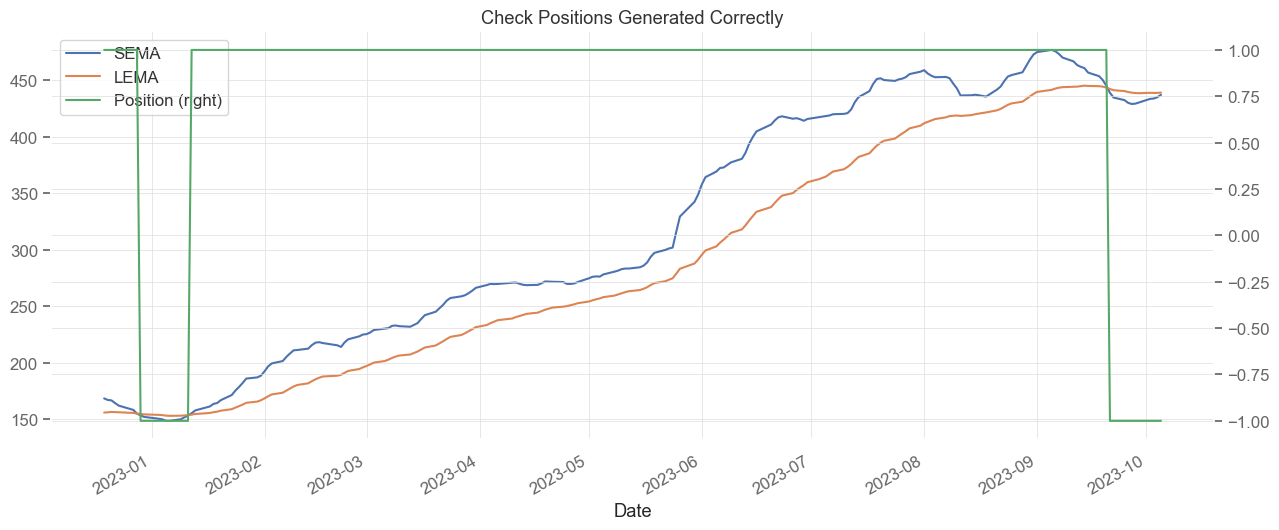

In [24]:
# Create analysis

# A plot to check if the strategy is working as planned:
df2[["SEMA", "LEMA", "Position"]].tail(200).plot(figsize=(15, 6), secondary_y='Position', grid=True)
plt.title("Check Positions Generated Correctly")
plt.show()

<Axes: xlabel='Date'>

Text(0.5, 1.0, "Buy & hold' vs 'Crossover Strategy' Cumulative Returns")

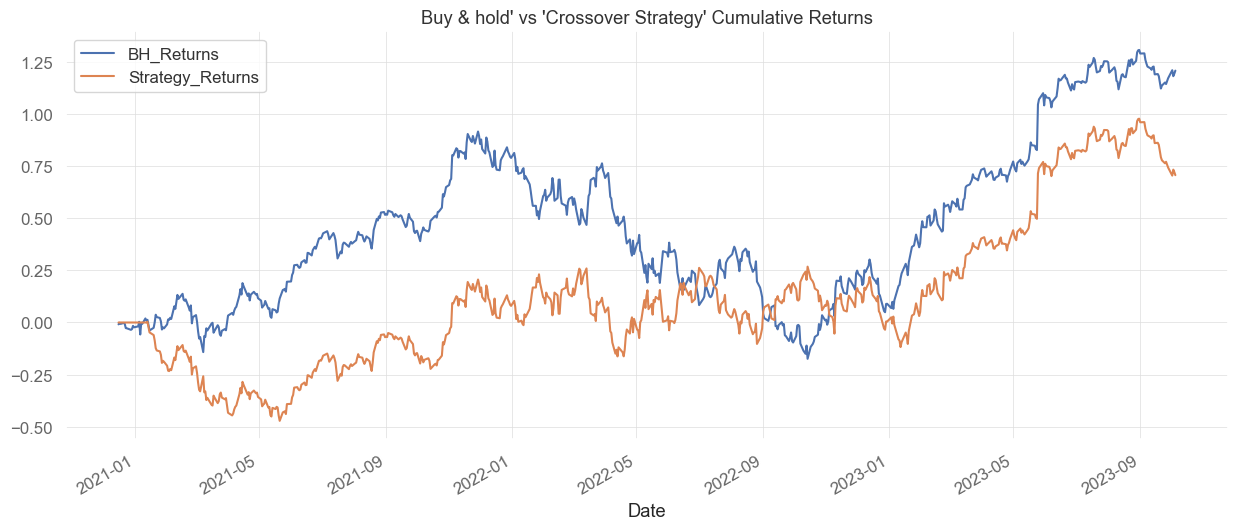

In [25]:
# A plot to check how the strategy performs relative to buy & hold
df2[['BH_Returns','Strategy_Returns']].cumsum().plot(figsize=(15, 6), secondary_y='Position', grid=True)
plt.title("Buy & hold' vs 'Crossover Strategy' Cumulative Returns")
plt.show()

In [26]:
# Copy and Modify Data to Remove N/A's for QS Analyis Reports
df3 = df2.copy()

# Remove NAs
df3.dropna(inplace=True)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,LMA,SEMA,LEMA,SEMA_PREV,LEMA_PREV,Signal,Position,BH_Returns,Strategy_Returns
Date,,,,,,,,,,,,,,,,
2020-12-16,134.225006,134.372498,132.125000,132.425003,132.138824,22311600,132.739001,134.30215,133.390452,133.558722,133.604996,133.604996,0,0,-0.008871,-0.0
2020-12-17,133.667496,133.794998,131.785004,133.412506,133.124207,23138400,132.684251,134.17760,133.394462,133.552988,133.390452,133.558722,0,0,0.007429,0.0
2020-12-18,133.789993,134.050003,130.705002,132.720001,132.433182,34206400,132.398001,134.06425,133.271832,133.520321,133.394462,133.552988,0,0,-0.005204,-0.0
2020-12-21,130.747498,133.699997,129.675003,133.322495,133.034409,30233200,132.123500,133.97815,133.281044,133.512564,133.271832,133.520321,0,0,0.004529,0.0
2020-12-22,133.192505,133.372498,130.539993,132.782501,132.495544,18558000,132.051750,133.78860,133.190400,133.483934,133.281044,133.512564,0,0,-0.004059,-0.0


                    Strategy
------------------  ----------
Start Period        2020-12-16
End Period          2023-10-05
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   37.48%
CAGR﹪              8.16%

Sharpe              0.48
Prob. Sharpe Ratio  78.91%
Sortino             0.74
Sortino/√2          0.52
Omega               1.08

Max Drawdown        -41.92%
Longest DD Days     435

Gain/Pain Ratio     0.08
Gain/Pain (1M)      0.46

Payoff Ratio        1.16
Profit Factor       1.08
Common Sense Ratio  1.22
CPC Index           0.61
Tail Ratio          1.12
Outlier Win Ratio   3.21
Outlier Loss Ratio  3.1

MTD                 -2.76%
3M                  -12.92%
6M                  29.56%
YTD                 83.75%
1Y                  58.42%
3Y (ann.)           8.16%
5Y (ann.)           8.16%
10Y (ann.)          8.16%
All-time (ann.)     8.16%

Avg. Drawdown       -13.2%
Avg. Drawdown Days  74
Recovery Factor     1.69
Ulcer Index         0.21
Serenity Index      0.32


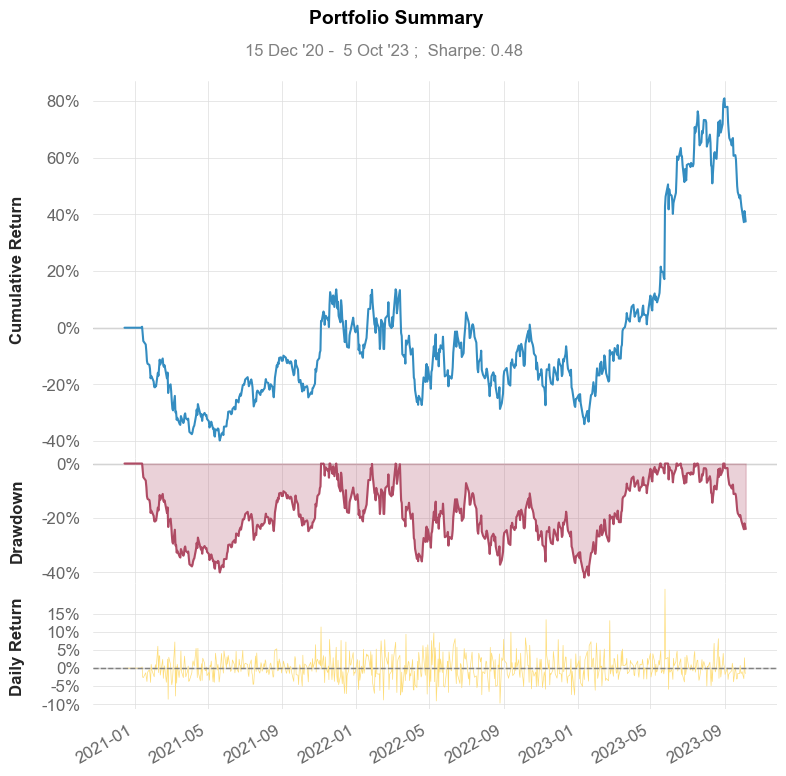

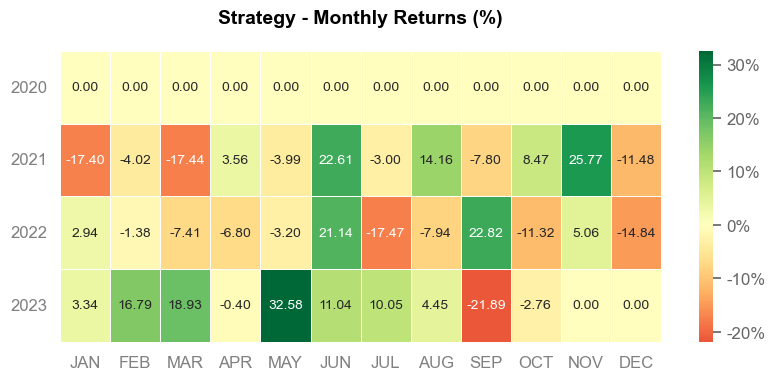

In [27]:
# Generate analytics
qs.reports.basic(df3['Strategy_Returns'])

# Quant Stats and Index DateTime Format
QS needs the datetimeindex format to be YYYY-MM-DD this is difficult to do correctly due to a pandas DataFrame has a bug that was fixed in __version__ 0.15.1 and above. Datatimes were incorrectly formatted giving charts that look strange and mangled and dates that are incompatible with QS.

If loading data from csv we must use both parse_dates=True and dayfirst=True
e.g. csv_df = pd.read_csv("MA-Data.csv", index_col="Date", parse_dates=True, dayfirst=True)

Should this not work, then copy the dataframe and recreate the index and convert it to datetime as shown below.

In [28]:
# Convert the index to datetime format for the qs module
#df4 = df3.copy()
#df4.index = pd.to_datetime(df4.index)

In [29]:
#df4.head()

In [30]:
# Generate analytics
#qs.reports.basic(df4['Strategy_Returns'])